<a href="https://colab.research.google.com/github/joseclara1/Analise-de-Dataset.2/blob/main/An%C3%A1lise_de_Postagens_de_Emprego_no_LinkedIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Neste trabalho, vamos analisar vagas de empregos de tecnologia no LinkedIn e tirar conclusões com base no dataset.

In [10]:
df = pd.read_csv('final_data.csv')
df.sample(3)

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
717,Uplers,Class 2,PPC Executive- Associate,Karnataka,44,793022,Full-time,Mid-Senior level,5000,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
687,Uplers,Class 2,Web Developer - Python,Haryana,24,793022,Full-time,Mid-Senior level,5000,IT Services and IT Consulting,...,0,1,1,0,0,0,0,0,1,1
782,Uplers,Class 2,React Developer,Gujarat,77,793022,Full-time,Mid-Senior level,5000,IT Services and IT Consulting,...,1,0,1,0,0,0,0,0,0,0


Vamos prestar atenção que o dataset consiste em quarenta e uma variáveis independentes, que são:

In [11]:
df.columns.tolist()

['Company_Name',
 'Class',
 'Designation',
 'Location',
 'Total_applicants',
 'LinkedIn_Followers',
 'Level',
 'Involvement',
 'Employee_count',
 'Industry',
 'PYTHON',
 'C++',
 'JAVA',
 'HADOOP',
 'SCALA',
 'FLASK',
 'PANDAS',
 'SPARK',
 'NUMPY',
 'PHP',
 'SQL',
 'MYSQL',
 'CSS',
 'MONGODB',
 'NLTK',
 'TENSORFLOW',
 'LINUX',
 'RUBY',
 'JAVASCRIPT',
 'DJANGO',
 'REACT',
 'REACTJS',
 'AI',
 'UI',
 'TABLEAU',
 'NODEJS',
 'EXCEL',
 'POWER BI',
 'SELENIUM',
 'HTML',
 'ML']

Podemos observar que as colunas chave no dataset são:
- 'Company_Name'
- 'Class'
- 'Designation'
- 'Location'
- 'Total_applicants'
- 'LinkedIn_Followers'
- 'Level'
- 'Involvement'
- 'Employee_count'
- 'Industry'

Todas as outras colunas são variáveis binárias que indicam a presença ou ausência de tecnologias específicas nas vagas de emprego.

# Valores ausentes

Vamos verificar se há valores ausentes nos dados.

In [12]:
def verificar_valores_ausentes(column):
    nan_percentage = df[column].isnull().sum() / df[column].size
    print(f'"{column}" coluna consiste de {nan_percentage:.2%} valores ausentes')

for column in df.columns:
    verificar_valores_ausentes(column)

"Company_Name" coluna consiste de 0.00% valores ausentes
"Class" coluna consiste de 0.00% valores ausentes
"Designation" coluna consiste de 0.00% valores ausentes
"Location" coluna consiste de 0.00% valores ausentes
"Total_applicants" coluna consiste de 0.00% valores ausentes
"LinkedIn_Followers" coluna consiste de 0.00% valores ausentes
"Level" coluna consiste de 0.00% valores ausentes
"Involvement" coluna consiste de 0.00% valores ausentes
"Employee_count" coluna consiste de 0.00% valores ausentes
"Industry" coluna consiste de 0.00% valores ausentes
"PYTHON" coluna consiste de 0.00% valores ausentes
"C++" coluna consiste de 0.00% valores ausentes
"JAVA" coluna consiste de 0.00% valores ausentes
"HADOOP" coluna consiste de 0.00% valores ausentes
"SCALA" coluna consiste de 0.00% valores ausentes
"FLASK" coluna consiste de 0.00% valores ausentes
"PANDAS" coluna consiste de 0.00% valores ausentes
"SPARK" coluna consiste de 0.00% valores ausentes
"NUMPY" coluna consiste de 0.00% valores a

Excelente, um dataset sem valores ausentes – parece raro!

Talvez haja alguns duplicados por aí que não queremos?

In [13]:
if df.duplicated().any():
    print("Os mesmos valores encontrados.")
else:
    print("Os mesmos valores não encontrados.")

Os mesmos valores não encontrados.


Certo, parece que nossos dados estão bem limpos, não é?

# Tipos de Dados

Vamos ver uma amostra para entender melhor os tipos de dados.

In [15]:
formatted_data = []
column_name_width = 30
column_value_width = 35

for column_name, column_value in df.loc[1].items():
    column_dtype = df[column_name].dtype
    formatted_data.append(f"{column_name.ljust(column_name_width)}{str(column_value).ljust(column_value_width)}{column_dtype}")

sample_output = "\n".join(formatted_data)
print(sample_output)

Company_Name                  Wipro                              object
Class                         Class 3                            object
Designation                   Project Manager                    object
Location                       Delhi                             object
Total_applicants              121                                int64
LinkedIn_Followers            6737300                            int64
Level                         Full-time                          object
Involvement                    Entry level                       object
Employee_count                10001                              int64
Industry                       IT Services and IT Consulting     object
PYTHON                        0                                  int64
C++                           0                                  int64
JAVA                          0                                  int64
HADOOP                        0                                  int64

# Análise de Dados

Principais Ocupações:

Quais são as principais ocupações em demanda que as empresas estão buscando no LinkedIn?

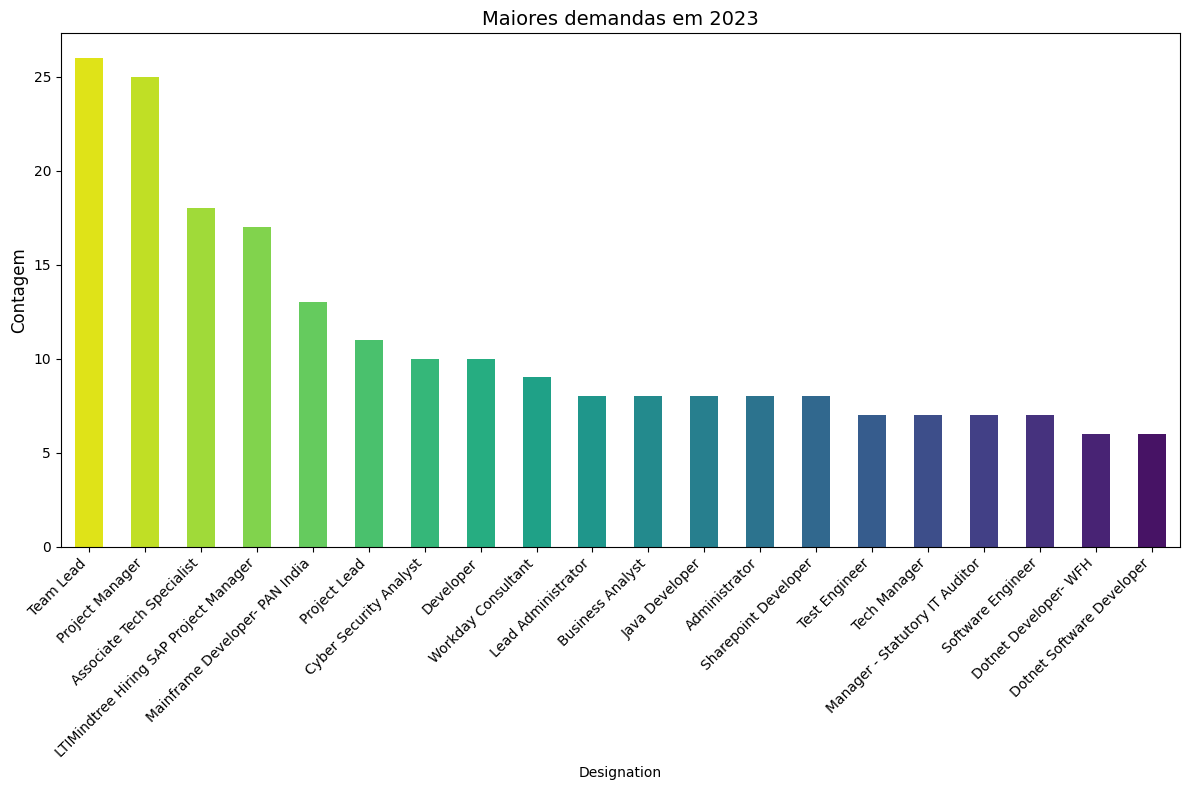

In [21]:
top_designation_series = df['Designation'].value_counts().head(20)

color_palette = sns.color_palette("viridis", len(top_designation_series))

top_designation_series.plot(kind='bar', color=color_palette[::-1], figsize=(12, 8))

plt.title('Maiores demandas em 2023', fontsize=14)
plt.ylabel('Contagem', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

Parece que, em 2023, as empresas estão principalmente buscando líderes, gerentes de projeto e especialistas técnicos, com um foco significativo em cargos nas áreas de cibersegurança, desenvolvimento de software, SAP e desenvolvimento de mainframe.

# Tecnologias mais demandadas:

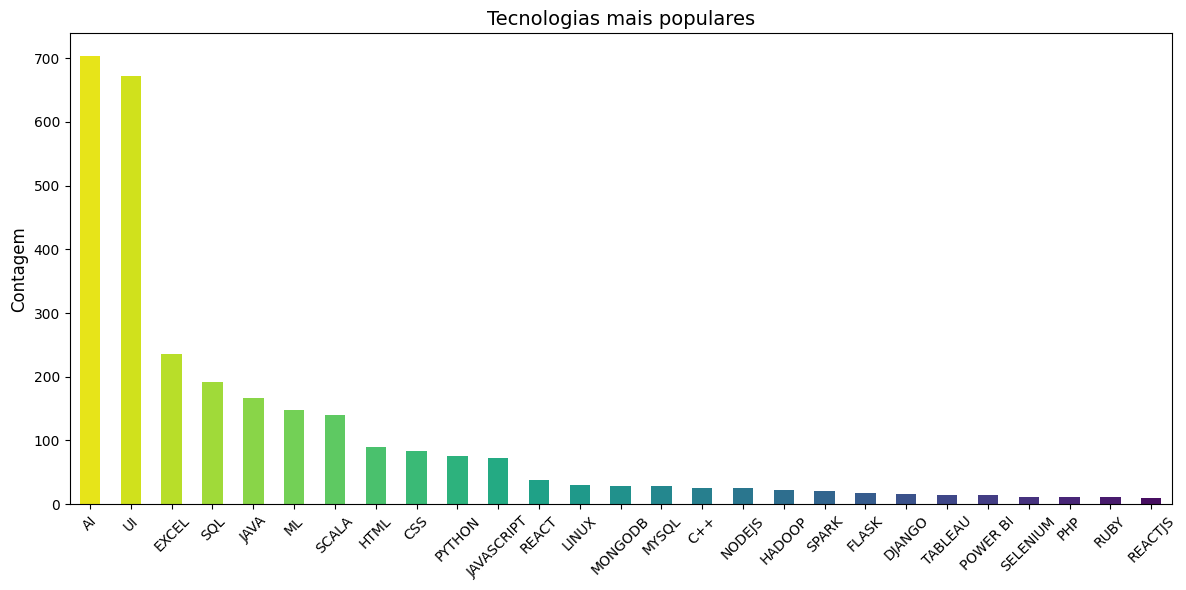

In [23]:
technologies_count = df[df.columns[10:]].sum().sort_values(ascending=False)[:27]

color_palette = sns.color_palette("viridis", len(technologies_count))

plt.figure(figsize=(12, 6))

technologies_count.plot(kind='bar', color=color_palette[::-1])

plt.title('Tecnologias mais populares', fontsize=14)
plt.ylabel('Contagem', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# Nível das Ofertas de Emprego
Qual é a distribuição das ofertas de emprego por nível de posição?

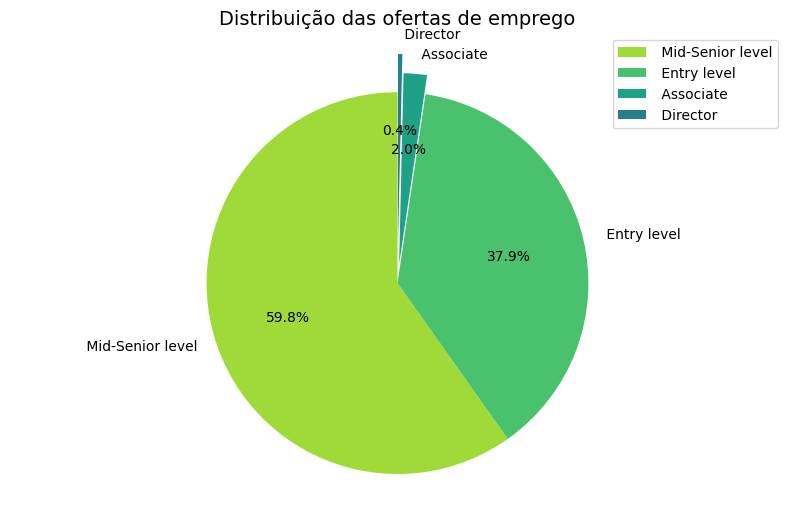

In [24]:
levels_count = df.Involvement.value_counts().sort_values(ascending=False)

explode = (0, 0, 0.1, 0.2)
color_palette = sns.color_palette("viridis")[::-1]

plt.figure(figsize=(10, 6))

plt.pie(levels_count, labels=levels_count.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=sns.color_palette("viridis")[::-1])

plt.legend(loc='best')

plt.title('Distribuição das ofertas de emprego', fontsize=14)

plt.axis('equal')
plt.show()

Podemos observar que:

- A maioria das ofertas de emprego se enquadra na categoria de nível Mid-Senior, indicando uma alta demanda por profissionais experientes.
- Posições de nível Entry-level e Associate também são predominantes, mostrando oportunidades consistentes para iniciantes.
- Posições de Diretor são limitadas, pois normalmente exigem experiência extensa e especialização em um campo específico.

# Melhores industrias / Demanda

<ipython-input-25-2b1d83cedc60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industries_count.index, y=industries_count.values, palette = color_palette)


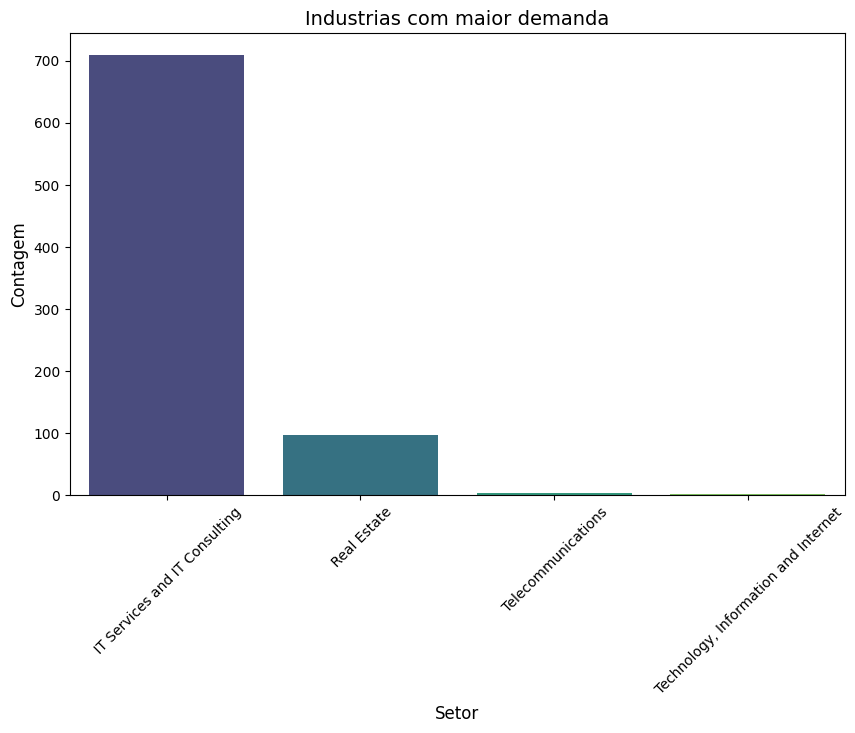

In [25]:
industries_count = df.Industry.value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

color_palette = sns.color_palette("viridis", len(industries_count))

sns.barplot(x=industries_count.index, y=industries_count.values, palette = color_palette)

plt.title('Industrias com maior demanda', fontsize=14)
plt.xlabel('Setor', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

plt.xticks(rotation=45)

plt.show()

Está claro que o setor de TI domina claramente todos os outros setores.

# Por ultimo, Número médio de candidatos por nível de posição, para se ter uma ideia da concorrencia

<ipython-input-26-35c413774652>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_applicants_per_level.index, y=avg_applicants_per_level.values, palette = color_palette)


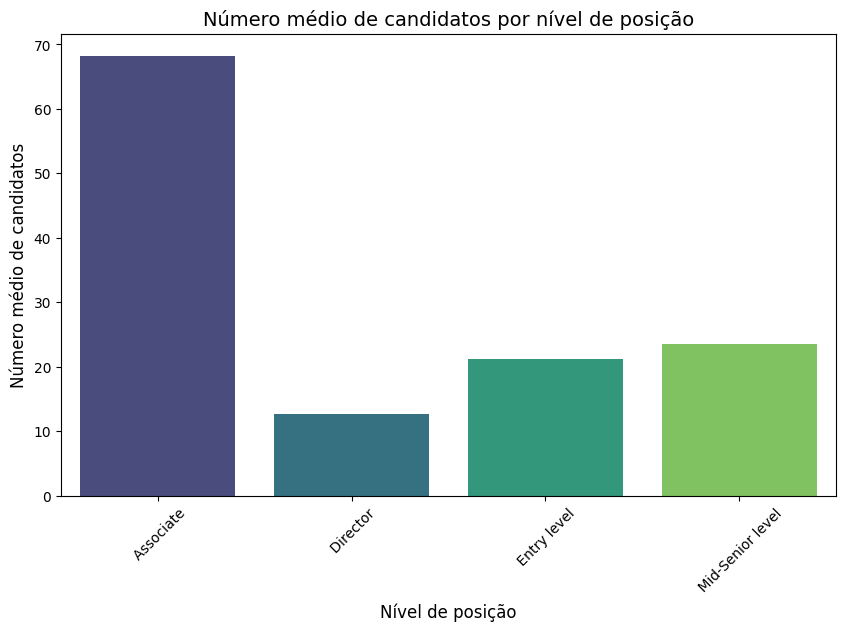

In [26]:
avg_applicants_per_level = df.groupby('Involvement')['Total_applicants'].mean()

avg_applicants_per_level = df.groupby('Involvement')['Total_applicants'].mean()

plt.figure(figsize=(10, 6))

color_palette = sns.color_palette("viridis", len(avg_applicants_per_level))

sns.barplot(x=avg_applicants_per_level.index, y=avg_applicants_per_level.values, palette = color_palette)

plt.title('Número médio de candidatos por nível de posição', fontsize=14)
plt.xlabel('Nível de posição', fontsize=12)
plt.ylabel('Número médio de candidatos', fontsize=12)

plt.xticks(rotation=45)

plt.show()

Como era de se esperar, as posições de nível iniciante, como Associate, tendem a receber o maior número de candidatos. Muitas pessoas estão ansiosas para se reinventar ou iniciar suas carreiras adquirindo experiência valiosa nessas funções.